#  K means Clustering

In [16]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [17]:
#Loading the dataset from csv file
iris=pd.read_csv("https://raw.githubusercontent.com/dpsh16/Sparks-GRIP/Iris/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris.shape #checking shape of our data

(150, 6)

In [19]:
#check if any variable value is null
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
#Getting stats of the data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## How to find the optimum value of clusters(i.e., k) 

In [24]:
#finding number of clusters
x=iris.iloc[:,[0,1,2,3]].values
SSE=[]
for cluster in range(1,20):
    kmeans=KMeans(n_clusters=cluster,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)


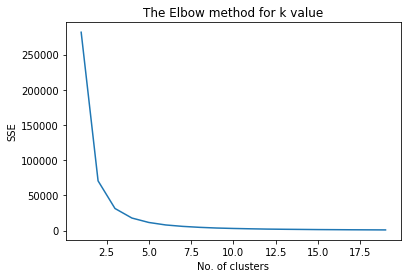

In [26]:
#Plotting the graph to observe elbow
plt.plot(range(1,20),SSE)
plt.title('The Elbow method for k value')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')  #Sum of squares
plt.show()

From the above graph it is clear the optimum value of k is between 2.5-5.0 so choosing the number of clusters as :
               **4**

In [28]:
kmeans=KMeans(n_jobs=-1,n_clusters=4)
kmeans.fit(x)
pred=kmeans.predict(x)

In [29]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
frame=pd.DataFrame(x)
frame['cluster']=pred

In [31]:
frame['cluster'].value_counts()

1    39
3    38
2    37
0    36
Name: cluster, dtype: int64

In [32]:
frame.head()

,0,1,2,3,cluster
0,1.0,5.1,3.5,1.4,1
1,2.0,4.9,3.0,1.4,1
2,3.0,4.7,3.2,1.3,1
3,4.0,4.6,3.1,1.5,1
4,5.0,5.0,3.6,1.4,1


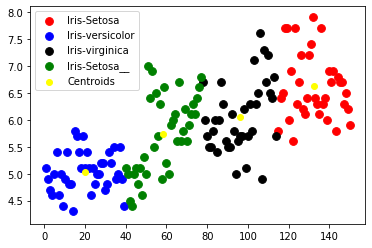

In [38]:
#Visualising the clusters
plt.scatter(x[pred==0,0],x[pred==0,1],c='red',s=60,label="Iris-Setosa")
plt.scatter(x[pred==1,0],x[pred==1,1],c='blue',s=60,label="Iris-versicolor")
plt.scatter(x[pred==2,0],x[pred==2,1],c='black',s=60,label="Iris-virginica")
plt.scatter(x[pred==3,0],x[pred==3,1],c='green',s=60,label="Iris-Setosa__")

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="yellow",label="Centroids")
plt.legend()